<a href="https://colab.research.google.com/github/BilalZ10/Bilal-Zahalan/blob/master/facial_emotion_recognition_Full.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Facial Emotion Recognition using Convolutional neural networks

Congratulations ! now you know all the theory behind Convolutional Neural Networks and you are ready to build your own model!


In this project, we will build our own model to predict emotions based on facial expressions. 
By the end of this lab you will get an understanding of how neural networks are built from multiple layers using Keras library. you will get a closer look to the structure of your network and you will be also able to train, validate and test your network.


Since our dataset is large, training the network will take lots of time. for this specific reason we are using google colab which will allow us to use google GPUs to accelerate our training process. 




## Prepare your dataset
The first thing we need to do is to prepare our dataset. First we need to download the dataset then unzip the folder to be able to acces the images.
This is done using the following command.

In [ ]:
!wget https://www.dropbox.com/s/dbde3a58uoe657b/dataset.zip
!wget https://www.dropbox.com/s/fpd04vdlapvldq6/image_commons.py
!unzip dataset.zip

## Dataset is now downloaded !
After this step open ur table of content and go to files. You should be able to see the folder kaggle. Inside you should find 3 folders: train, test and validate. If the folder is not showing click on the refresh icon.

The data inside train will be used for training. The data inside validate will serve as a private test. It is for us to use to know if our model is being trained correclty and to make sure we don't fall into over fitting. 

The data inside the test folder will serve as our public test data. we will use it to test the performance of our model. 



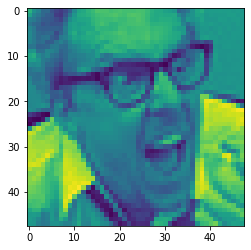

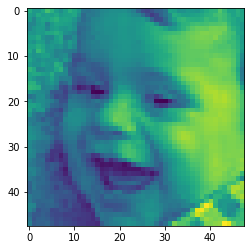

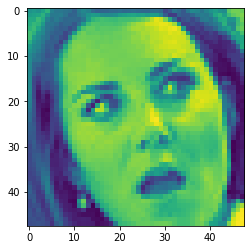

In [ ]:
#import libraries needed for data visualization 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing import image
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
import matplotlib
from sklearn.metrics import confusion_matrix, classification_report



img = mpimg.imread("/content/kaggle/train/angry/Training_3908.jpg")
imgplot = plt.imshow(img)
plt.show()


img = mpimg.imread("/content/kaggle/train/happy/Training_10070997.jpg")
imgplot = plt.imshow(img)
plt.show()

img = mpimg.imread("/content/kaggle/train/surprise/Training_10060820.jpg")
imgplot = plt.imshow(img)
plt.show()


##Preparing the data

Now that our data is downloaded we need to prepare the images for it to be fed to the network.

We need to define 3 paths. One for each set.

It is very important to normalise the images used. the RGB values are between 0 and 255. so using rescale=1./255 will normalise the image.

The flow from directory function automatically creates the training set for you based on the structure of your file. you only need to specify the size of the image, the batch size and the class mode and it will create the dataset automatically for you.



In [ ]:
train_dir = '/content/kaggle/train'
val_dir = '/content/kaggle/validation'
test_dir = '/content/kaggle/test'


train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)

#generate ur training, validation and testing dataset
training_set = train_datagen.flow_from_directory(
        train_dir,
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

val_set = val_datagen.flow_from_directory(
        val_dir,
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

test_set=val_datagen.flow_from_directory(
        test_dir,
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical',
        shuffle=False)

Found 19647 images belonging to 5 classes.
Found 2435 images belonging to 5 classes.
Found 2486 images belonging to 5 classes.


## Data Summary

In [ ]:
# import needed for data summary
import glob
import os
import pandas as pd
from pandas import DataFrame

path = r'/content/kaggle'            

#we shall store all the file names in this list
filelist = []

for root, dirs, files in os.walk(path):
  for file in files:
    if file.endswith('.jpg'):
      filelist.append(os.path.join(root,file))
  
df_files = DataFrame (filelist,columns=['fila_path'])

In [ ]:
df_data = df_files["fila_path"].str.split("/", n = 6, expand = True)
col = ['index','Content1','Path','Folder','Category','FileName']
df_data.columns  =col
df_data=df_data[['Folder','Category']]

In [ ]:
df_data.groupby(["Folder"]).count()

,Category
Folder,
test,2486
train,19647
validation,2435


In [ ]:
df_data.groupby(["Folder", "Category"]).size()

Folder      Category
test        angry        467
            disgust       56
            happy        895
            sad          653
            surprise     415
train       angry       3995
            disgust      436
            happy       7215
            sad         4830
            surprise    3171
validation  angry        491
            disgust       55
            happy        879
            sad          594
            surprise     416
dtype: int64

#Building the network
## Let's start by importing our libraries 

All the layers used in the network should be imported

In [ ]:
#import required libraries
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.optimizers import Adam

Now that everything is imported we can start by building the network


In [ ]:
# create ur CNN Model 
emotion_model = Sequential()

#adding the layers
#step 1 add ur first Conv layers
# (nbr of filter, kernel size (row,col),input shape, activation )
emotion_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
emotion_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))

#step -2 add the Pooling layer
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))

#step -3 add drop out layer
emotion_model.add(Dropout(0.25))

emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))

emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))

#step -4 when you are satified with your feature extractor add Flattening layer.
emotion_model.add(Flatten())

#step -5 add ur Fully connected layers
emotion_model.add(Dense(1024, activation='relu',))
emotion_model.add(Dropout(0.25))
emotion_model.add(Dense(5, activation='softmax'))

#now let's see a summary of our model
emotion_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 44, 44, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 22, 22, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 22, 22, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 20, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 128)         1

# why to use droupouts
A common problem in computer vision is over fitting. over fitting is when your model achieves very high accuracy over the trained dataset but cannot generalize well on new data. 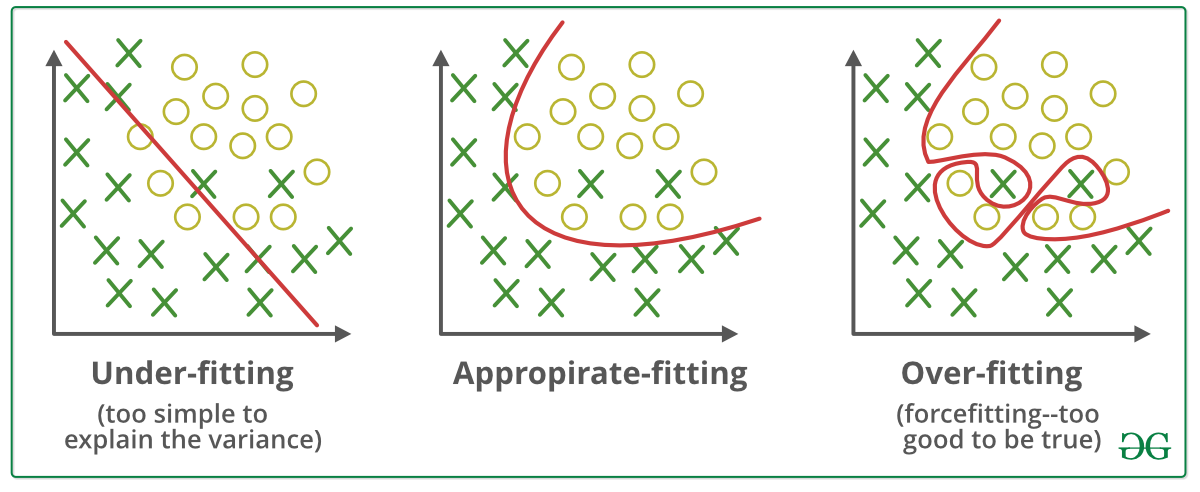
One way to solve over fitting is to introduce drop out layers. these layers randomly drops a specific percentage of the neurons to make sure that the final decision does not depend heavily on a specific feature because at any time this feature might disappear 

##Training the model
Now that our model is built we can start the training process. 
The first step is always to compile your network.
Step number 2 is to train the network specifing the number of epochs.



In [ ]:
emotion_model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.0001),metrics=['accuracy'])

emotion_model_info = emotion_model.fit(
        training_set,
        epochs=25,
        validation_data=val_set)

Epoch 1/25
307/307 [==============================] - 41s 24ms/step - loss: 1.4338 - accuracy: 0.3658 - val_loss: 1.2980 - val_accuracy: 0.4452
Epoch 2/25
307/307 [==============================] - 7s 21ms/step - loss: 1.2303 - accuracy: 0.4951 - val_loss: 1.1298 - val_accuracy: 0.5503
Epoch 3/25
307/307 [==============================] - 7s 21ms/step - loss: 1.1162 - accuracy: 0.5496 - val_loss: 1.0623 - val_accuracy: 0.5721
Epoch 4/25
307/307 [==============================] - 7s 21ms/step - loss: 1.0334 - accuracy: 0.5839 - val_loss: 1.0058 - val_accuracy: 0.5893
Epoch 5/25
307/307 [==============================] - 7s 21ms/step - loss: 0.9871 - accuracy: 0.6145 - val_loss: 0.9593 - val_accuracy: 0.6103
Epoch 6/25
307/307 [==============================] - 7s 21ms/step - loss: 0.9346 - accuracy: 0.6308 - val_loss: 0.9083 - val_accuracy: 0.6361
Epoch 7/25
307/307 [==============================] - 7s 21ms/step - loss: 0.8980 - accuracy: 0.6432 - val_loss: 0.8908 - val_accuracy: 0.645

## Visualizing the results
Lets plot our loss and accuracy to see our model performance

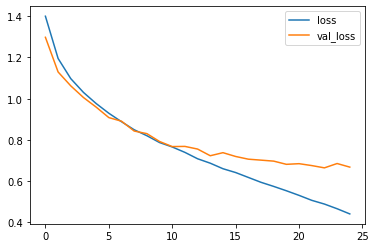

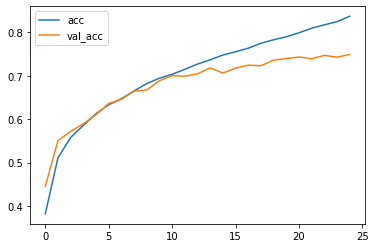

In [ ]:
# Loss vs Val Loss
loss = emotion_model_info.history['loss']
val_loss = emotion_model_info.history['val_loss']
plt.plot(loss)
plt.plot(val_loss)
plt.legend(['loss', 'val_loss'])
plt.show()

#Accuracy vs Val accuracy
loss = emotion_model_info.history['accuracy']
val_loss = emotion_model_info.history['val_accuracy']
plt.plot(loss)
plt.plot(val_loss)
plt.legend(['acc', 'val_acc'])
plt.show()

##Now let's test our model !

In [ ]:
emotion_model.evaluate(test_set)

#let's get an idea about our class indices to assess our model
print(test_set.class_indices)

39/39 [==============================] - 1s 19ms/step - loss: 0.7011 - accuracy: 0.7462
{'angry': 0, 'disgust': 1, 'happy': 2, 'sad': 3, 'surprise': 4}


## Test Performance

we will choose images from our test data set and see what will our network predict!

In [ ]:
# let's create a function that will plot our image
def plot_image(test_image):
  img = mpimg.imread(test_image)
  imgplot = plt.imshow(img)
  plt.show()

#and a function that will outpu the predicted emotion
def predict_emotion(test_image):
  emotion=['Angry','Disgust','Happy','Sad','Surprise']
  test_image = image.load_img(test_image, target_size = (48,48),color_mode='grayscale')
  test_image = image.img_to_array(test_image)
  test_image = np.expand_dims(test_image, axis = 0)
  neural_net_output=emotion_model.predict(test_image)[0]
  print(neural_net_output)
  neural_net_output=neural_net_output.tolist()
  print(emotion [neural_net_output.index(max(neural_net_output))])

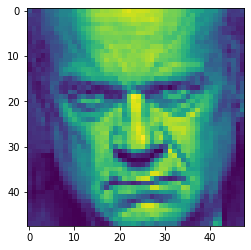

[1.0000000e+00 0.0000000e+00 0.0000000e+00 3.2045603e-35 0.0000000e+00]
Angry


In [ ]:
#let's choose an image of an angry candidate. what would the neural network predict?
test_image='/content/kaggle/test/angry/PublicTest_10813312.jpg'
plot_image(test_image)
predict_emotion(test_image)

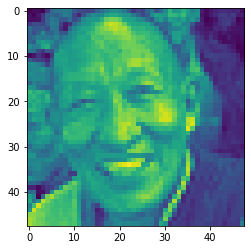

[0. 0. 1. 0. 0.]
Happy


In [ ]:
#let's choose an image of a happy candidate. what would the neural network predict
test_image='/content/kaggle/test/happy/PublicTest_10181609.jpg'
plot_image(test_image)
predict_emotion(test_image)

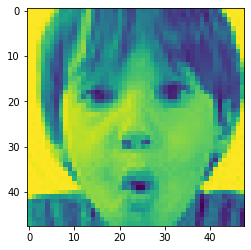

[0. 0. 0. 0. 1.]
Surprise


In [ ]:
#let's choose an image of an surprised candidate dataset. what would the neural network predict
test_image='/content/kaggle/test/surprise/PublicTest_10709121.jpg'
plot_image(test_image)
predict_emotion(test_image)

#Confusion Matrix 
For better visualization of your model performance you can use a confusion matrix.

              precision    recall  f1-score   support

       angry       0.58      0.63      0.60       467
     disgust       0.84      0.48      0.61        56
       happy       0.82      0.88      0.85       895
         sad       0.71      0.63      0.66       653
    surprise       0.82      0.82      0.82       415

    accuracy                           0.75      2486
   macro avg       0.76      0.69      0.71      2486
weighted avg       0.75      0.75      0.74      2486



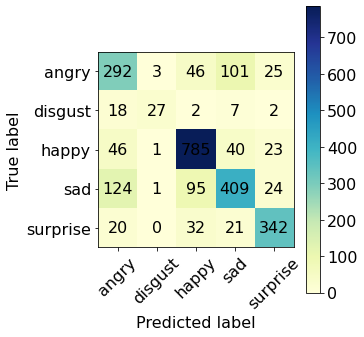

In [ ]:

# prediction and true labels
y_prob = emotion_model.predict(test_set)
y_pred = np.argmax(y_prob, axis=1)
y_true = test_set.classes
labels = ['angry', 'disgust', 'happy', 'sad', 'surprise']

def plot_confusion_matrix(y_true, y_pred, cmap=plt.cm.Blues):
    cm = confusion_matrix(y_true, y_pred)
    fig = plt.figure(figsize=(5,5))
    matplotlib.rcParams.update({'font.size': 16})
    ax  = fig.add_subplot(111)
    matrix = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    fig.colorbar(matrix) 
    for i in range(0,5):
        for j in range(0,5):  
            ax.text(j,i,cm[i,j],va='center', ha='center')
    ticks = np.arange(len(labels))
    ax.set_xticks(ticks)
    ax.set_xticklabels(labels, rotation=45)
    ax.set_yticks(ticks)
    ax.set_yticklabels(labels)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
plot_confusion_matrix(y_true, y_pred, cmap=plt.cm.YlGnBu)

print(classification_report(test_set.classes, y_pred, target_names=labels))


#CONGRATULATIONS !! you have built your emotion classifier !
Now it's time to use our neural network model in a real life problem. we will build a face-emoji swapper !
The following code will turn on your webcam, detect your face, emotion, and replace your face with the corresponding emoji in real time !
Let's take a look on how it is done

In [ ]:
# first import the libraries required for this exercise
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time
from image_commons import nparray_as_image, draw_with_alpha
from google.colab import output
from numpy import asarray

#running a webcam in colab
The next 2 shels will be used to open the webcam live video stream in google colab since cv2.videoCapture() cannot be used in google colab. No need to undertsand 100% what is going on in the following 2 shells its just a turn around to open the live video stream.

In [ ]:
# function to convert the JavaScript object into an OpenCV image
#this is because we cannot easily acces the webcame from google colab using cv2.VideoCapture() so we need to convert the images from js to openCv images
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)
  return img

# function to convert the emojies image into base64 byte string to be overlayed on video stream
def emoji_to_bytes(image):
  # convert array into PIL image
  emoji_PIL = PIL.Image.fromarray(image)
  iobuf = io.BytesIO()
  # format bbox into png for return
  emoji_PIL.save(iobuf, format='png')
  # format return string
  emoji_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return emoji_bytes

In [ ]:
# JavaScript to properly create our live video stream using our webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;
    
    var pendingResolve = null;
    var shutdown = false;
    
    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }
    
    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }
    
    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);
      
      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);
           
      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);
      
      const instruction = document.createElement('div');
      instruction.innerHTML = 
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };
      
      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);
      
      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();
      
      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }
            
      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }
      
      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;
      
      return {'create': preShow - preCreate, 
              'show': preCapture - preShow, 
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)
  
def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

#Let's implement our face-emoji swapper
Now that our environment is ready we can start with building the face-eoji swapper. 

In [ ]:

# start streaming video from webcam
video_stream()

# label for video
label_html = 'Capturing...'

#create a list of potential emotions
emotions = [ 'anger', 'disgust', 'happy', 'sadness', 'surprise']

#load the emojies from the graphics folder
emoticons = [nparray_as_image(cv2.imread('/content/kaggle/graphics/%s.png' % emotion, -1), mode=None) for emotion in emotions]

bemoji=[]
while True:
    js_reply = video_frame(label_html, bemoji)
    if not js_reply:
        break

    # convert JS response to OpenCV Image
    img = js_to_image(js_reply["img"])

    # grayscale image for face detection
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    # first initialize the Haar Cascade face detection model
    face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))

    # get face region coordinates
    faces = face_cascade.detectMultiScale(gray)

    # cut the face, normalize the image and feed it to ur neural network for prediction
    for (x,y,w,h) in faces:
      #cut the face region
      cutted_face = gray[y:y + h, x:x + w]

      #normalise so that the size of the face matches the network input
      normalized_face =cv2.resize(cutted_face, (48, 48), interpolation = cv2.INTER_AREA)

      #fix the image type and format before feeding to the network
      normalized_face = image.img_to_array(normalized_face)
      normalized_face = np.expand_dims(normalized_face, axis = 0)

      # predict the emotion
      prediction = emotion_model.predict(normalized_face)[0]  # do prediction
      neural_net_output=prediction.tolist()
      prediction=neural_net_output.index(max(neural_net_output))

      # choose the corresponding emoji 
      image_to_draw = emoticons[prediction]

      #graw the emoji over the face
      draw_with_alpha(img, image_to_draw, (x, y, w, h))

    #convert the image into bytes to be able to display it in colab
    emoji_bytes = emoji_to_bytes(asarray(img))

    # update bbox so next frame gets new overlay
    bemoji=emoji_bytes

IndentationError: ignored